In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import pickle as pkl

import numpy as np

from sklearn import svm

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier

from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [3]:
df = pd.read_excel('./../data/HealthCareData.xlsx')

df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [5]:
df.shape

(950, 42)

In [9]:
df.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                     True
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [11]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [13]:
categorical_features = df.select_dtypes(include=[np])
categorical_features.columns

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/dtypes/common.py:1645: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  npdtype = np.dtype(dtype)


Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

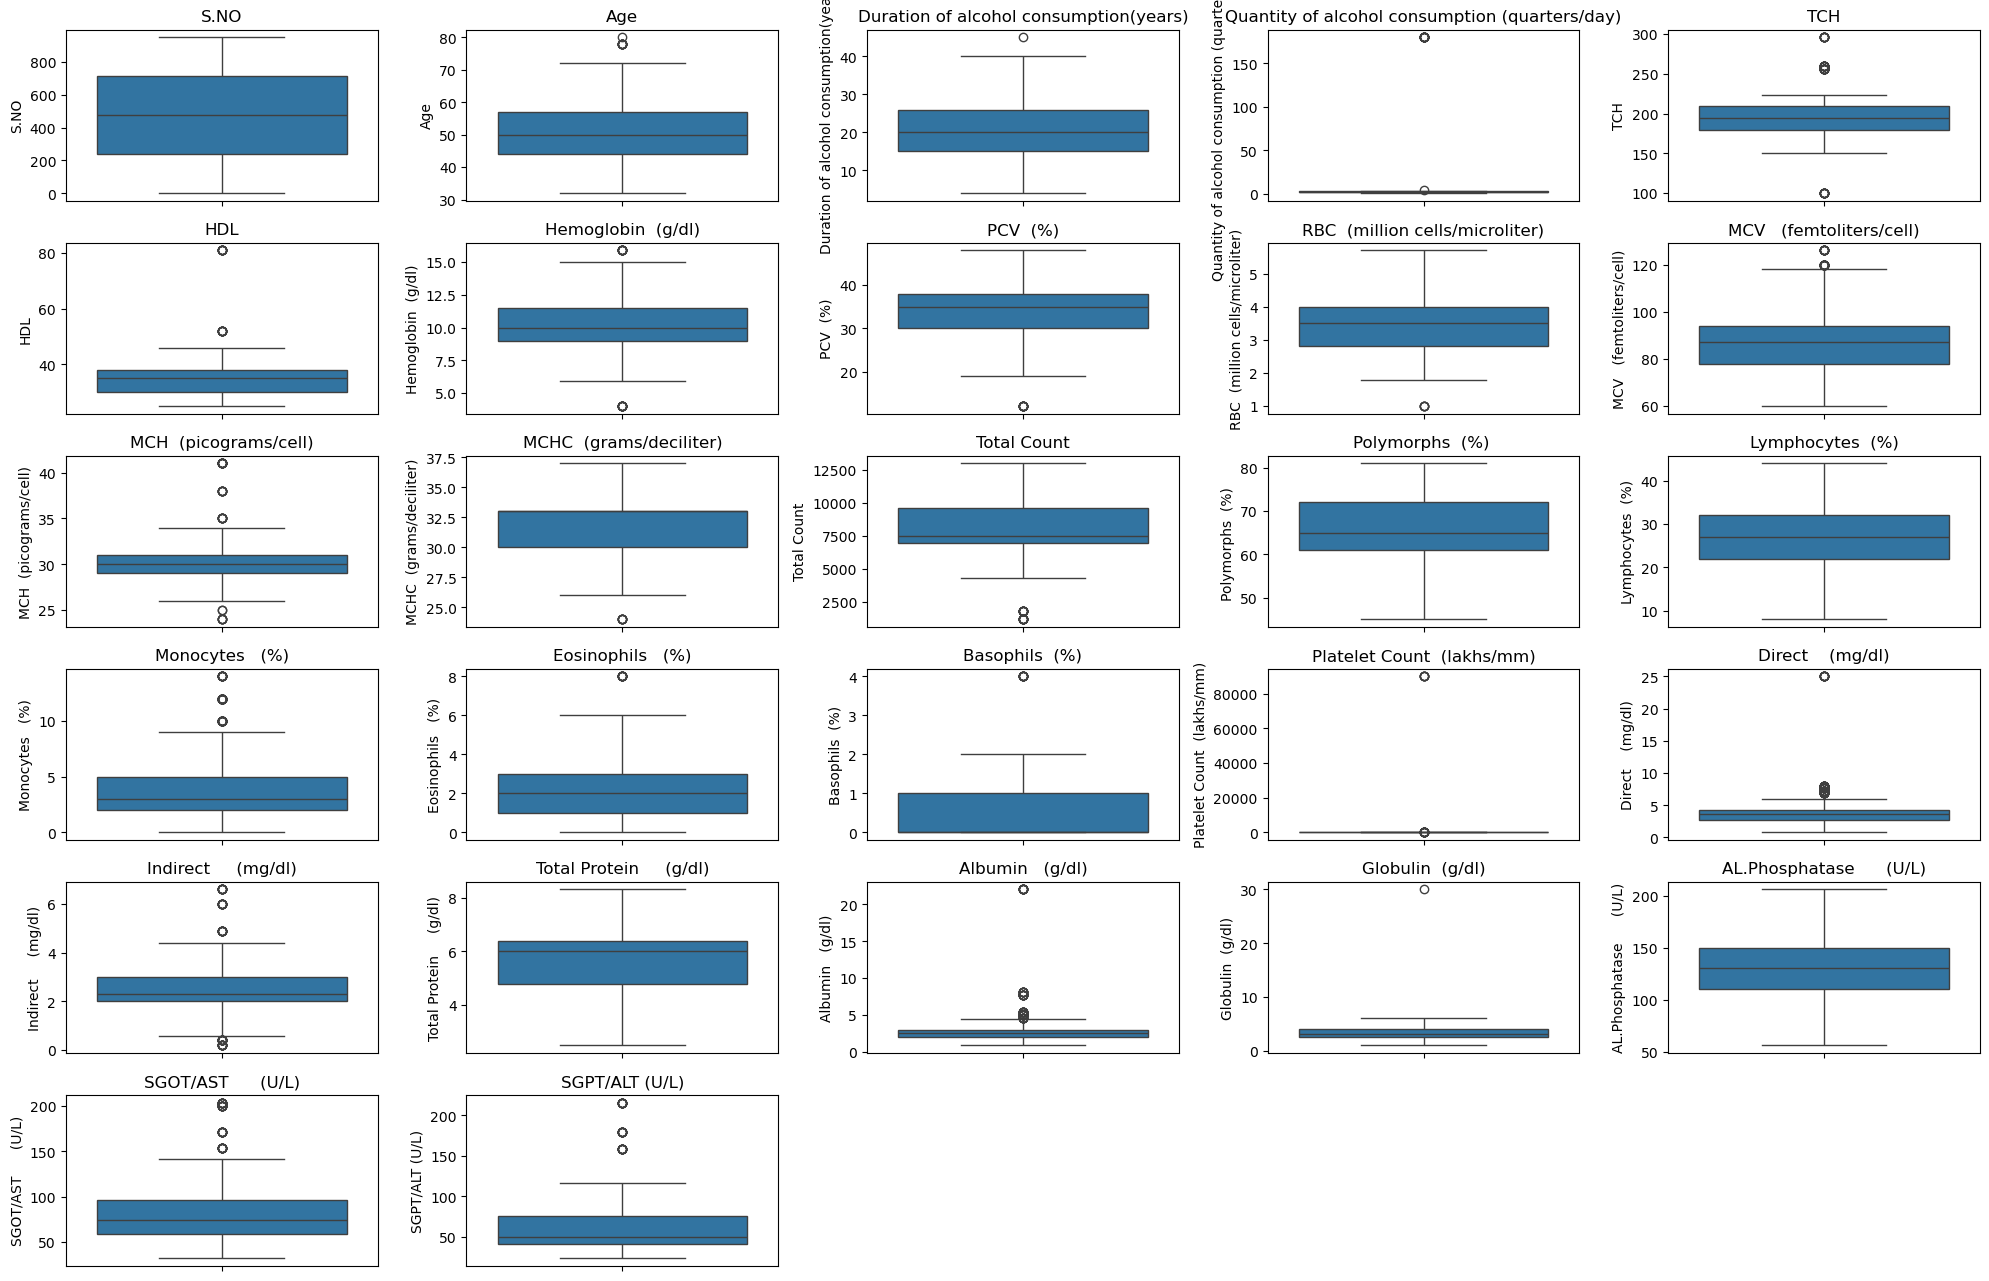

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

c = 0
plt.figure(figsize=(20, 15))

for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        plt.subplot(7, 5, c + 1)
        sns.boxplot(y=df[i])  # Use y=df[i] to avoid deprecation warnings
        plt.title(i)
        c += 1

plt.tight_layout()
plt.show()


In [17]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


Text(0.5, 1.0, 'Gender vs Diabetes Result')

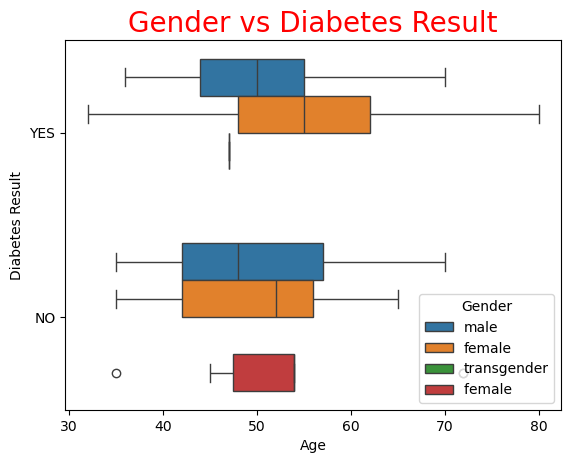

In [19]:
sns.boxplot(x='Age',y='Diabetes Result',data=df,hue='Gender')
plt.title('Gender vs Diabetes Result',color='red',size=20)

['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)', 'Duration of alcohol consumption(years)', 'Quantity of alcohol consumption (quarters/day)', 'Type of alcohol consumed', 'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)', 'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG', 'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%)', 'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)', 'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)', 'USG Abdomen (diffuse liver or  not)', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']


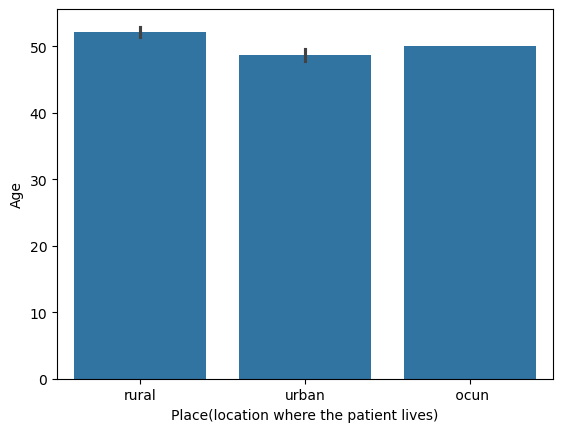

In [39]:
sns.barplot(x=df['Place(location where the patient lives)'],y=df['Age'])
# Strip whitespace from column names
print(df.columns.tolist())

Text(0.5, 1.0, 'Place vs Age')

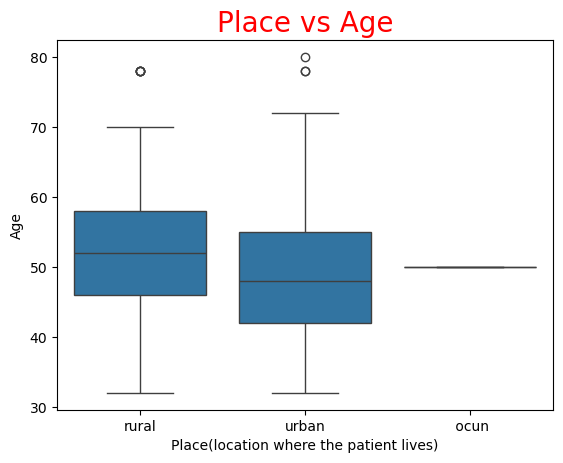

In [31]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=df)
plt.title('Place vs Age',color='red',size=20)

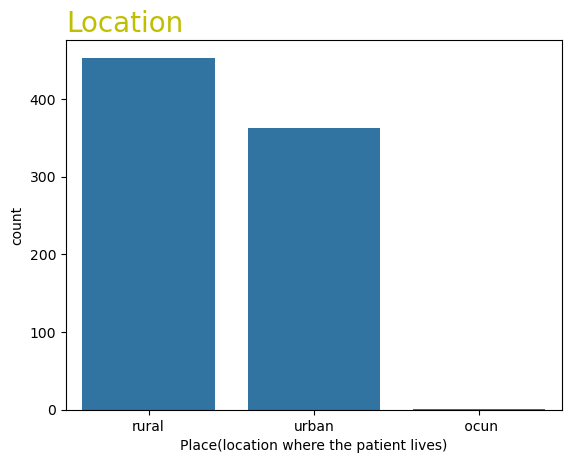

In [41]:
sns.countplot(data=df,x='Place(location where the patient lives)')
plt.title("Location",color='y',size=20,loc='left')
plt.show()

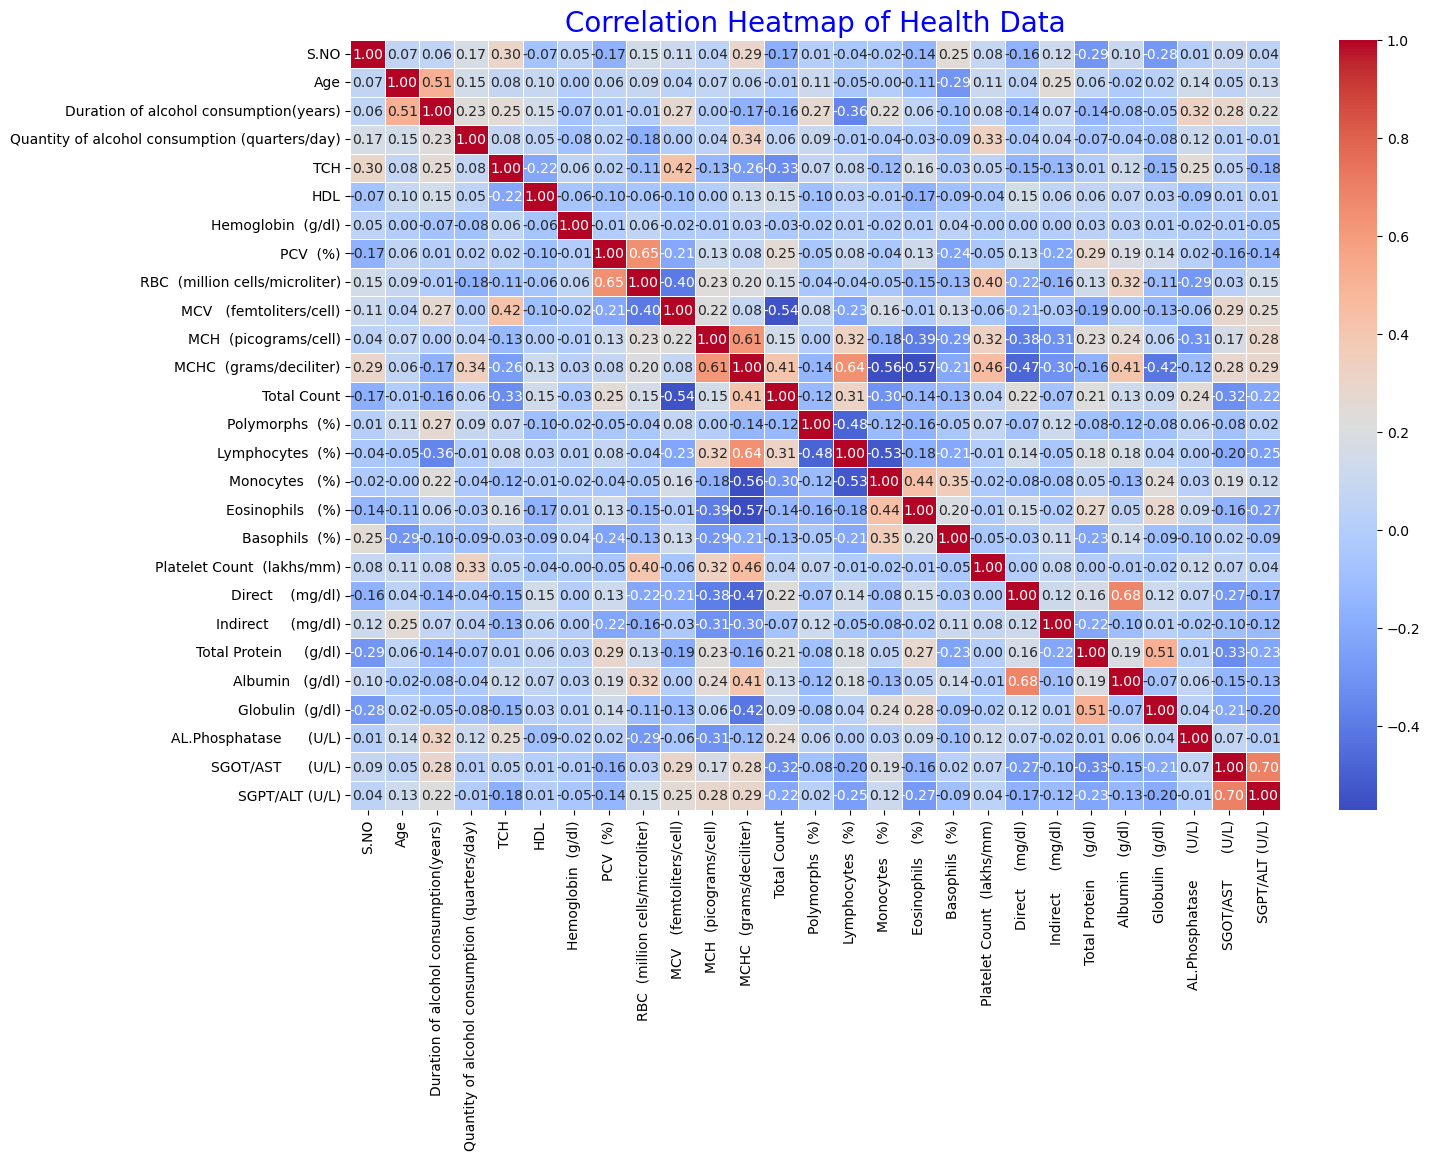

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Larger figure for clarity

sns.heatmap(
    df.corr(numeric_only=True),   # Ensures only numeric columns
    annot=True,                   # Shows correlation numbers
    cmap="coolwarm",              # Color theme
    linewidths=0.5,               # Adds lines between cells
    fmt=".2f"                     # Format decimal numbers
)

plt.title("Correlation Heatmap of Health Data", fontsize=20, color="blue")
plt.show()



In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example dataset
df = pd.read_excel('./../data/HealthCareData.xlsx')  # or read_excel()

# Define features and target
X = df.drop('Diabetes Result', axis=1)
y = df['Diabetes Result']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check
print("Training Features Shape:", x_train.shape)
print("Testing Features Shape:", x_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (760, 41)
Testing Features Shape: (190, 41)
Training Labels Shape: (760,)
Testing Labels Shape: (190,)


In [47]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Blood pressure (mmhg),...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
936,937,72,female,urban,4,3,branded liquor,negative,negative,120/80,...,2.0,5.3,4.2,3.5,NaN,110.0,110,70,no,no
290,291,52,male,urban,12,1,country liquor,negative,negative,130/70,...,3.0,6.0,3.0,4.0,0.75,110.0,58,35,YES,YES
544,545,38,male,urban,24,3,both,negative,negative,120/70,...,1.0,4.0,2.0,2.0,01:01:00,100.0,94,106,YES,YES
275,276,60,female,rural,10,3,both,negative,negative,140/100,...,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES,YES
109,110,50,male,rural,15,1,country liquor,negative,negative,120/86,...,2.0,7.0,3.0,4.0,NaN,120.0,79,84,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,54,male,rural,20,2,country liquor,negative,negative,130/76,...,3.9,5.0,2.0,3.0,NaN,110.0,86,79,YES,YES
270,271,60,female,rural,10,3,both,Positive,Positive,140/100,...,1.8,6.4,2.9,3.7,0.87,144.0,54,41,YES,YES
860,861,57,male,rural,25,3,both,Positive,Positive,110/170,...,NaN,NaN,2.0,4.5,0.44,157.0,88,56,YES,YES
435,436,55,female,rural,20,2,country liquor,Positive,Positive,70/60,...,1.5,5.0,2.5,2.5,NaN,152.0,172,180,YES,YES


In [49]:
x_test

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Blood pressure (mmhg),...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
199,200,44,male,NaN,25,3,both,Positive,Positive,112/70,...,3.5,3.0,1.4,1.6,NaN,114.0,204,108,YES,YES
929,930,50,male,NaN,20,3,both,negative,negative,110/70,...,3.0,4.0,3.0,1.0,03:01:00,120.0,110,70,no,YES
693,694,42,male,NaN,22,3,both,Positive,Positive,110/70,...,3.0,3.0,1.2,1.8,02:03:00,184.0,72,40,YES,YES
798,799,51,male,rural,25,2,country liquor,negative,negative,144/92,...,2.0,4.8,22.0,2.6,NaN,145.0,64,43,YES,YES
874,875,38,male,rural,10,3,both,Positive,Positive,140/100,...,2.0,NaN,2.1,4.3,0.48,130.0,56,48,YES,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,70,male,rural,40,1,both,Positive,Positive,118/70,...,2.6,5.1,1.6,3.5,01:02:00,134.0,56,24,YES,YES
33,34,62,male,rural,40,2,both,negative,negative,160/100,...,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES,YES
31,32,62,male,rural,40,2,both,negative,negative,160/100,...,NaN,NaN,2.1,4.2,0.5,140.0,84,55,YES,YES
710,711,46,male,rural,18,2,country liquor,negative,negative,120/80,...,0.9,6.0,4.0,2.0,02:01:00,180.0,84,96,YES,YES


In [51]:
y_train

936     NO
290    YES
544     NO
275    YES
109    YES
      ... 
106    YES
270    YES
860    YES
435    YES
102    YES
Name: Diabetes Result, Length: 760, dtype: object

In [53]:
y_test

199    YES
929     NO
693    YES
798    YES
874    YES
      ... 
598     NO
33     YES
31     YES
710    YES
298    YES
Name: Diabetes Result, Length: 190, dtype: object

In [64]:
print(x_train.select_dtypes(include='object').columns)

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Blood pressure (mmhg)', 'Obesity',
       'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')


In [80]:
from sklearn.preprocessing import OrdinalEncoder

# List of columns to encode
cols_to_encode = ['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Obesity',
       'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']

# Strip trailing spaces in advance
x_train[cols_to_encode] = x_train[cols_to_encode].astype(str).apply(lambda col: col.str.strip())
x_test[cols_to_encode] = x_test[cols_to_encode].astype(str).apply(lambda col: col.str.strip())

# Initialize OrdinalEncoder that handles unknowns
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on training data and transform both train/test
x_train[cols_to_encode] = encoder.fit_transform(x_train[cols_to_encode])
x_test[cols_to_encode] = encoder.transform(x_test[cols_to_encode])

In [86]:
# Drop columns that are not strings
x_train = x_train.loc[:, x_train.columns.map(type) == str]
x_test = x_test.loc[:, x_test.columns.map(type) == str]

# Also force all column names to be strings just in case
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [96]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numeric only

x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [84]:
print(x_train.columns.tolist())

['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)', 'Duration of alcohol consumption(years)', 'Quantity of alcohol consumption (quarters/day)', 'Type of alcohol consumed', 'Hepatitis B infection', 'Hepatitis C infection', 'Blood pressure (mmhg)', 'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG', 'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)', 'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)', 'USG Abdomen (diffuse liver or  not)', 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', ('Gender', 'Place(locat

In [98]:
print('Blood pressure (mmhg)' in x_test.columns)

True


In [100]:
x_train.drop(columns=['Blood pressure (mmhg)'], errors='ignore', inplace=True)
x_test.drop(columns=['Blood pressure (mmhg)'], errors='ignore', inplace=True)

In [102]:
# This will show non-numeric columns (if any)
print(x_test.select_dtypes(include='object').columns)

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Obesity',
       'Family history of cirrhosis/ hereditary', 'TCH', 'TG', 'LDL', 'HDL',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)',
       'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)',
       'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)',
       'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abdomen (diffuse liver or  not)',
       'Pred

In [104]:
from sklearn.impute import SimpleImputer

# Convert all column names to string
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Ensure all values are numeric
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')

# Handle NaNs
imputer = SimpleImputer(strategy='most_frequent')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

In [106]:
print(x_train.dtypes)   # All should be numeric
print(x_test.isnull().sum().sum())  # Should be 0

S.NO                                                                       float64
Age                                                                        float64
Gender                                                                     float64
Place(location where the patient lives)                                    float64
Duration of alcohol consumption(years)                                     float64
Quantity of alcohol consumption (quarters/day)                             float64
Type of alcohol consumed                                                   float64
Hepatitis B infection                                                      float64
Hepatitis C infection                                                      float64
Obesity                                                                    float64
Family history of cirrhosis/ hereditary                                    float64
TCH                                                                        float64
TG  

In [116]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

In [110]:
x_train


,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Obesity,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,937.0,72.0,0.0,3.0,4.0,3.0,1.0,1.0,1.0,0.0,...,2.0,5.3,4.2,3.5,44.0,110.0,110.0,70.0,1.0,2.0
1,291.0,52.0,1.0,3.0,12.0,1.0,2.0,1.0,1.0,0.0,...,3.0,6.0,3.0,4.0,11.0,110.0,58.0,35.0,0.0,0.0
2,545.0,38.0,1.0,3.0,24.0,3.0,0.0,1.0,1.0,0.0,...,1.0,4.0,2.0,2.0,23.0,100.0,94.0,106.0,0.0,0.0
3,276.0,60.0,0.0,2.0,10.0,3.0,0.0,1.0,1.0,1.0,...,1.8,6.4,2.9,3.7,17.0,144.0,54.0,41.0,0.0,0.0
4,110.0,50.0,1.0,2.0,15.0,1.0,2.0,1.0,1.0,1.0,...,2.0,7.0,3.0,4.0,44.0,120.0,79.0,84.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,107.0,54.0,1.0,2.0,20.0,2.0,2.0,1.0,1.0,1.0,...,3.9,5.0,2.0,3.0,44.0,110.0,86.0,79.0,0.0,0.0
756,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,1.0,...,1.8,6.4,2.9,3.7,17.0,144.0,54.0,41.0,0.0,0.0
757,861.0,57.0,1.0,2.0,25.0,3.0,0.0,0.0,0.0,1.0,...,3.0,4.0,2.0,4.5,3.0,157.0,88.0,56.0,0.0,0.0
758,436.0,55.0,0.0,2.0,20.0,2.0,2.0,0.0,0.0,1.0,...,1.5,5.0,2.5,2.5,44.0,152.0,172.0,180.0,0.0,0.0


In [112]:
y_train

936     NO
290    YES
544     NO
275    YES
109    YES
      ... 
106    YES
270    YES
860    YES
435    YES
102    YES
Name: Diabetes Result, Length: 760, dtype: object

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [118]:
x_train


,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Obesity,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,937.0,72.0,0.0,3.0,4.0,3.0,1.0,1.0,1.0,0.0,...,2.0,5.3,4.2,3.5,44.0,110.0,110.0,70.0,1.0,2.0
1,291.0,52.0,1.0,3.0,12.0,1.0,2.0,1.0,1.0,0.0,...,3.0,6.0,3.0,4.0,11.0,110.0,58.0,35.0,0.0,0.0
2,545.0,38.0,1.0,3.0,24.0,3.0,0.0,1.0,1.0,0.0,...,1.0,4.0,2.0,2.0,23.0,100.0,94.0,106.0,0.0,0.0
3,276.0,60.0,0.0,2.0,10.0,3.0,0.0,1.0,1.0,1.0,...,1.8,6.4,2.9,3.7,17.0,144.0,54.0,41.0,0.0,0.0
4,110.0,50.0,1.0,2.0,15.0,1.0,2.0,1.0,1.0,1.0,...,2.0,7.0,3.0,4.0,44.0,120.0,79.0,84.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,107.0,54.0,1.0,2.0,20.0,2.0,2.0,1.0,1.0,1.0,...,3.9,5.0,2.0,3.0,44.0,110.0,86.0,79.0,0.0,0.0
756,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,1.0,...,1.8,6.4,2.9,3.7,17.0,144.0,54.0,41.0,0.0,0.0
757,861.0,57.0,1.0,2.0,25.0,3.0,0.0,0.0,0.0,1.0,...,3.0,4.0,2.0,4.5,3.0,157.0,88.0,56.0,0.0,0.0
758,436.0,55.0,0.0,2.0,20.0,2.0,2.0,0.0,0.0,1.0,...,1.5,5.0,2.5,2.5,44.0,152.0,172.0,180.0,0.0,0.0


In [120]:
y_train

936     NO
290    YES
544     NO
275    YES
109    YES
      ... 
106    YES
270    YES
860    YES
435    YES
102    YES
Name: Diabetes Result, Length: 760, dtype: object

In [152]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
logistic=log.fit(x_train,y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
x_train

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Obesity,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,937.0,72.0,0.0,3.0,4.0,3.0,1.0,1.0,1.0,0.0,...,2.0,5.3,4.2,3.5,44.0,110.0,110.0,70.0,1.0,2.0
1,291.0,52.0,1.0,3.0,12.0,1.0,2.0,1.0,1.0,0.0,...,3.0,6.0,3.0,4.0,11.0,110.0,58.0,35.0,0.0,0.0
2,545.0,38.0,1.0,3.0,24.0,3.0,0.0,1.0,1.0,0.0,...,1.0,4.0,2.0,2.0,23.0,100.0,94.0,106.0,0.0,0.0
3,276.0,60.0,0.0,2.0,10.0,3.0,0.0,1.0,1.0,1.0,...,1.8,6.4,2.9,3.7,17.0,144.0,54.0,41.0,0.0,0.0
4,110.0,50.0,1.0,2.0,15.0,1.0,2.0,1.0,1.0,1.0,...,2.0,7.0,3.0,4.0,44.0,120.0,79.0,84.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,107.0,54.0,1.0,2.0,20.0,2.0,2.0,1.0,1.0,1.0,...,3.9,5.0,2.0,3.0,44.0,110.0,86.0,79.0,0.0,0.0
756,271.0,60.0,0.0,2.0,10.0,3.0,0.0,0.0,0.0,1.0,...,1.8,6.4,2.9,3.7,17.0,144.0,54.0,41.0,0.0,0.0
757,861.0,57.0,1.0,2.0,25.0,3.0,0.0,0.0,0.0,1.0,...,3.0,4.0,2.0,4.5,3.0,157.0,88.0,56.0,0.0,0.0
758,436.0,55.0,0.0,2.0,20.0,2.0,2.0,0.0,0.0,1.0,...,1.5,5.0,2.5,2.5,44.0,152.0,172.0,180.0,0.0,0.0


In [128]:
y_train

936     NO
290    YES
544     NO
275    YES
109    YES
      ... 
106    YES
270    YES
860    YES
435    YES
102    YES
Name: Diabetes Result, Length: 760, dtype: object

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  # You can change k

# ✅ Fit the model
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [132]:
print("X Train:\n", x_train)
print("Y Train:\n", y_train)


X Train:
       S.NO   Age  Gender  Place(location where the patient lives)  \
0    937.0  72.0     0.0                                      3.0   
1    291.0  52.0     1.0                                      3.0   
2    545.0  38.0     1.0                                      3.0   
3    276.0  60.0     0.0                                      2.0   
4    110.0  50.0     1.0                                      2.0   
..     ...   ...     ...                                      ...   
755  107.0  54.0     1.0                                      2.0   
756  271.0  60.0     0.0                                      2.0   
757  861.0  57.0     1.0                                      2.0   
758  436.0  55.0     0.0                                      2.0   
759  103.0  52.0     1.0                                      2.0   

     Duration of alcohol consumption(years)  \
0                                       4.0   
1                                      12.0   
2                   

In [134]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [138]:
k=np.random.randint(1,50,60)

In [140]:
params={'n_neighbors':k}

In [144]:
random_search=RandomizedSearchCV(knn,params,n_iter=5,cv=5,n_jobs=-1,verbose=0)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 8, 30, 45, 32, 40, 31,  7, 47, 20,  2,  7, 33, 40, 38, 15, 23, 32,
        8, 30, 49, 26, 49, 17, 40, 14, 21,  6, 13, 16,  9, 45, 18, 31, 47,
        9, 15, 37, 16,  1, 37, 48, 35, 28, 27, 40,  1,  7, 18,  6, 49, 45,
       10, 41, 23, 30, 37,  2, 29, 10,  1])})

In [150]:
print('train_score-'+str(random_search.score(x_train,y_train)))
print('test_score-'+str(random_search.score(x_test,y_test)))

train_score-0.8355263157894737
test_score-0.7894736842105263
